In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('dataset.csv')
df_info = pd.read_csv('info.csv', index_col='LoanStatNew')

In [3]:
df_info['Description']

LoanStatNew
loan_amnt               The listed amount of the loan applied for by t...
term                    The number of payments on the loan. Values are...
int_rate                                        Interest Rate on the loan
installment             The monthly payment owed by the borrower if th...
grade                                              LC assigned loan grade
sub_grade                                       LC assigned loan subgrade
emp_title               The job title supplied by the Borrower when ap...
emp_length              Employment length in years. Possible values ar...
home_ownership          The home ownership status provided by the borr...
annual_inc              The self-reported annual income provided by th...
verification_status     Indicates if income was verified by LC, not ve...
issue_d                               The month which the loan was funded
loan_status                                    Current status of the loan
purpose                 A 

In [4]:
def feat_info(col_name):
    print("Description: ", df_info.loc[col_name]['Description'])
    print("Type: ", type(df[col_name][0]))

In [5]:
feat_info('loan_amnt')

Description:  The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
Type:  <class 'numpy.float64'>


In [6]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [9]:
df['term'].value_counts()

term
 36 months    302005
 60 months     94025
Name: count, dtype: int64

In [10]:
df['term']=df['term'].apply(lambda x: 36 if x.split(' ')[1]=='36' else 60)

In [11]:
feat_info('grade')

Description:  LC assigned loan grade
Type:  <class 'str'>


In [12]:
feat_info('sub_grade')

Description:  LC assigned loan subgrade
Type:  <class 'str'>


In [13]:
df['grade'].value_counts().sort_index()

grade
A     64187
B    116018
C    105987
D     63524
E     31488
F     11772
G      3054
Name: count, dtype: int64

In [14]:
df['sub_grade'].value_counts().sort_index()

sub_grade
A1     9729
A2     9567
A3    10576
A4    15789
A5    18526
B1    19182
B2    22495
B3    26655
B4    25601
B5    22085
C1    23662
C2    22580
C3    21221
C4    20280
C5    18244
D1    15993
D2    13951
D3    12223
D4    11657
D5     9700
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: count, dtype: int64

In [15]:
df.drop('grade', axis=1, inplace=True)

In [16]:
sub_grades=pd.get_dummies(df['sub_grade'], drop_first=True, dtype=int)

In [17]:
df=pd.concat([df, sub_grades], axis=1)

In [18]:
df.drop('sub_grade', axis=1, inplace=True)

In [19]:
df.drop('emp_title', axis=1, inplace=True)

In [20]:
df.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36,11.44,329.48,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df['emp_length'].value_counts()

emp_length
10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: count, dtype: int64

In [22]:
import re

def get_number(x):
    try:
        y=re.findall(r'\d+', x)
        return int(y[0])
    except:
        return x

df['emp_length']=df['emp_length'].apply(get_number)

In [23]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

In [24]:
def convert_house_ownership(x):
    if x=='OTHER' or x == 'ANY' or x=='NONE':
        return 'OTHER'
    else:
        return x

df['home_ownership']=df['home_ownership'].apply(convert_house_ownership)

In [25]:
df=pd.concat([df, pd.get_dummies(df['home_ownership'], drop_first=True, dtype=int)], axis=1)

In [26]:
df.drop('home_ownership', axis=1, inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 60 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   emp_length            377729 non-null  float64
 5   annual_inc            396030 non-null  float64
 6   verification_status   396030 non-null  object 
 7   issue_d               396030 non-null  object 
 8   loan_status           396030 non-null  object 
 9   purpose               396030 non-null  object 
 10  title                 394274 non-null  object 
 11  dti                   396030 non-null  float64
 12  earliest_cr_line      396030 non-null  object 
 13  open_acc              396030 non-null  float64
 14  pub_rec               396030 non-null  float64
 15  

In [28]:
df['verification_status'].value_counts()

verification_status
Verified           139563
Source Verified    131385
Not Verified       125082
Name: count, dtype: int64

In [29]:
df=pd.concat([df, pd.get_dummies(df['verification_status'], drop_first=True, dtype=int)], axis=1)

In [30]:
df.drop('verification_status', axis=1, inplace=True)

In [31]:
feat_info('issue_d')

Description:  The month which the loan was funded
Type:  <class 'str'>


In [32]:
df.drop('issue_d', axis=1, inplace=True)

In [33]:
df['loan_status'].value_counts()

loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64

In [34]:
df=pd.concat([df, pd.get_dummies(df['loan_status'], drop_first=True ,dtype=int)], axis=1)

In [35]:
df.drop('loan_status', axis=1, inplace=True)

In [36]:
df['purpose'].value_counts()

purpose
debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: count, dtype: int64

In [37]:
# has very little correlation with the output
df.drop('purpose', axis=1, inplace=True)

In [38]:
df.drop('title', axis=1, inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 58 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   emp_length            377729 non-null  float64
 5   annual_inc            396030 non-null  float64
 6   dti                   396030 non-null  float64
 7   earliest_cr_line      396030 non-null  object 
 8   open_acc              396030 non-null  float64
 9   pub_rec               396030 non-null  float64
 10  revol_bal             396030 non-null  float64
 11  revol_util            395754 non-null  float64
 12  total_acc             396030 non-null  float64
 13  initial_list_status   396030 non-null  object 
 14  application_type      396030 non-null  object 
 15  

In [40]:
df['initial_list_status'].value_counts()

initial_list_status
f    238066
w    157964
Name: count, dtype: int64

In [41]:
# has very little correlation with the output
df.drop('initial_list_status', axis=1, inplace=True)

In [42]:
df['application_type'].value_counts()

application_type
INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: count, dtype: int64

In [43]:
# has very little correlation with the output
df.drop('application_type', axis=1, inplace=True)

In [44]:
df.drop('address', axis=1, inplace=True)

In [45]:
import re

def get_numbers(x):
    return int(re.findall(r'\d+', x)[0])

df ['earliest_cr_line'] = df ['earliest_cr_line'].apply(get_numbers)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 55 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   emp_length            377729 non-null  float64
 5   annual_inc            396030 non-null  float64
 6   dti                   396030 non-null  float64
 7   earliest_cr_line      396030 non-null  int64  
 8   open_acc              396030 non-null  float64
 9   pub_rec               396030 non-null  float64
 10  revol_bal             396030 non-null  float64
 11  revol_util            395754 non-null  float64
 12  total_acc             396030 non-null  float64
 13  mort_acc              358235 non-null  float64
 14  pub_rec_bankruptcies  395495 non-null  float64
 15  

In [47]:
df.dropna(inplace=True)

In [48]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'annual_inc', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4',
       'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1',
       'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5', 'OTHER', 'OWN', 'RENT', 'Source Verified', 'Verified',
       'Fully Paid'],
      dtype='object')

In [49]:
print(df.corr()['Fully Paid'].sort_values(ascending=False).reset_index().to_string())

                   index  Fully Paid
0             Fully Paid    1.000000
1               mort_acc    0.072277
2                     A4    0.063263
3                     A5    0.062345
4                     B1    0.058277
5                     A2    0.058122
6                     A3    0.058061
7                     B2    0.057328
8             annual_inc    0.052224
9                     B3    0.051872
10                    B4    0.041235
11                    B5    0.026966
12            emp_length    0.019361
13             total_acc    0.018718
14                    C1    0.016991
15             revol_bal    0.011537
16                    C2    0.001271
17                 OTHER   -0.000416
18  pub_rec_bankruptcies   -0.002550
19                   OWN   -0.005731
20                    C3   -0.012429
21               pub_rec   -0.013849
22                    G4   -0.020981
23                    C4   -0.022650
24                    G5   -0.023695
25                    C5   -0.026044
2

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = df.drop('Fully Paid', axis=1)
y = df['Fully Paid']

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=101, stratify=y_train)

In [51]:
len(y_train[y_train==0])/len(y_train)

0.1973972725568353

In [52]:
len(y_val[y_val==0])/len(y_val)

0.19738096984814027

In [53]:
X_train.shape

(245358, 54)

In [54]:
# Since data is very imbalanced, we can try undersampling

from sklearn.utils import resample

# Separate majority and minority classes
majority_class = df[df['Fully Paid'] == 1]
minority_class = df[df['Fully Paid'] == 0]

# Perform random undersampling on the majority class
undersampled_majority = resample(majority_class, replace=False, n_samples=len(minority_class)+5000, random_state=101)

# Combine the minority class and the undersampled majority class
undersampled_df = pd.concat([undersampled_majority, minority_class])

# Split the data into features and labels
X = undersampled_df.drop('Fully Paid', axis=1)
y = undersampled_df['Fully Paid']

# Apply MinMaxScaler to the features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=101, stratify=y_train)

In [55]:
len(y_train[y_train==0])/len(y_train)

0.4820882894540387

In [56]:
len(y_val[y_val==0])/len(y_val)

0.48203887843769594

In [57]:
X_train.shape

(100465, 54)

In [58]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Input, Dense, BatchNormalization, Dropout
from keras.callbacks import EarlyStopping

import keras_tuner as kt

Using TensorFlow backend


In [59]:
def build_model(hp):
    model = Sequential()
    model.add(Input(54,))

    for i in range(hp.Int('num_layers', min_value=1, max_value=8)):
        model.add(
            Dense(
                hp.Int('units'+str(i), min_value=8, max_value=512, step=8),
                activation=hp.Choice('activation'+str(i), values=['relu', 'tanh', 'sigmoid'])
            )
        )
        # model.add(BatchNormalization())
        model.add(Dropout(hp.Choice('droupout'+str(i), values=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=hp.Choice('optimizer', values=['rmsprop', 'adam', 'sgd', 'nadam', 'adadelta']),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model


In [60]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    directory='tuners',
    project_name='loan_default'
)

In [61]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Trial 10 Complete [00h 00m 27s]
val_accuracy: 0.6500644683837891

Best val_accuracy So Far: 0.6500644683837891
Total elapsed time: 00h 04m 40s


In [62]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 4,
 'units0': 416,
 'activation0': 'relu',
 'droupout0': 0.1,
 'optimizer': 'adam',
 'units1': 96,
 'activation1': 'sigmoid',
 'droupout1': 0.2,
 'units2': 264,
 'activation2': 'relu',
 'droupout2': 0.4,
 'units3': 440,
 'activation3': 'relu',
 'droupout3': 0.2,
 'units4': 432,
 'activation4': 'relu',
 'droupout4': 0.3,
 'units5': 96,
 'activation5': 'tanh',
 'droupout5': 0.2,
 'units6': 24,
 'activation6': 'relu',
 'droupout6': 0.5}

In [63]:
model = tuner.get_best_models(num_models=1)[0]

In [64]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 416)               22880     
                                                                 
 dropout (Dropout)           (None, 416)               0         
                                                                 
 dense_1 (Dense)             (None, 96)                40032     
                                                                 
 dropout_1 (Dropout)         (None, 96)                0         
                                                                 
 dense_2 (Dense)             (None, 264)               25608     
                                                                 
 dropout_2 (Dropout)         (None, 264)               0         
                                                                 
 dense_3 (Dense)             (None, 440)               1

In [65]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor="val_accuracy",
    min_delta=0.01,
    patience=10,
    verbose=1,
    mode="max",
    baseline=None,
    restore_best_weights=True
)

In [66]:
from keras.metrics import BinaryAccuracy

METRICS = [
      BinaryAccuracy(name='accuracy'),
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [67]:
history = model.fit(X_train, y_train, epochs=20, initial_epoch=5, batch_size=16 ,validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 6/20
6280/6280 [==============================] - 9s 1ms/step - loss: 0.6252 - accuracy: 0.6520 - val_loss: 0.6272 - val_accuracy: 0.6552
Epoch 7/20
6280/6280 [==============================] - 8s 1ms/step - loss: 0.6244 - accuracy: 0.6541 - val_loss: 0.6251 - val_accuracy: 0.6497
Epoch 8/20
6280/6280 [==============================] - 8s 1ms/step - loss: 0.6232 - accuracy: 0.6557 - val_loss: 0.6237 - val_accuracy: 0.6533
Epoch 9/20
6280/6280 [==============================] - 8s 1ms/step - loss: 0.6227 - accuracy: 0.6574 - val_loss: 0.6252 - val_accuracy: 0.6571
Epoch 10/20
6280/6280 [==============================] - 8s 1ms/step - loss: 0.6226 - accuracy: 0.6550 - val_loss: 0.6239 - val_accuracy: 0.6543
Epoch 11/20
6280/6280 [==============================] - 8s 1ms/step - loss: 0.6215 - accuracy: 0.6557 - val_loss: 0.6244 - val_accuracy: 0.6505
Epoch 12/20
6280/6280 [==============================] - 9s 1ms/step - loss: 0.6213 - accuracy: 0.6569 - val_loss: 0.6252 - val_accura

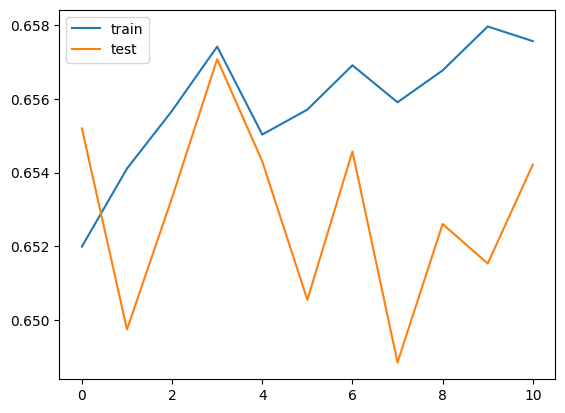

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()

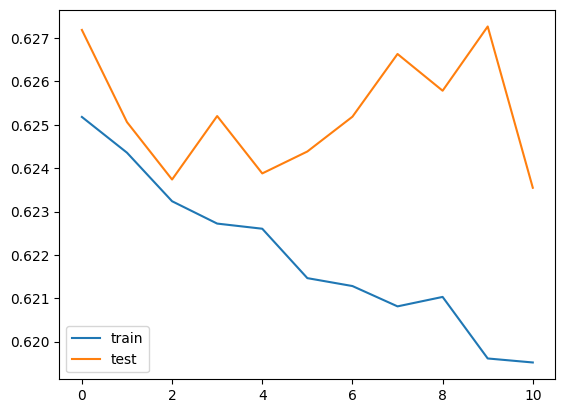

In [69]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [70]:
predictions = model.predict(X_test)

873/873 [==============================] - 0s 436us/step


In [71]:
predictions = np.where(predictions > 0.45, 1,0)

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.52      0.58     13454
           1       0.63      0.76      0.69     14454

    accuracy                           0.64     27908
   macro avg       0.65      0.64      0.64     27908
weighted avg       0.65      0.64      0.64     27908



Text(0.5, 1.0, 'Confusion Matrix')

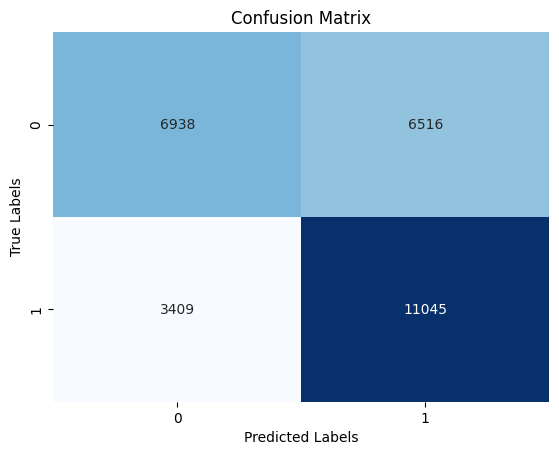

In [72]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:\n", classification_report(y_test, predictions))

conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')